# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhosaly
Processing Record 2 of Set 1 | tomatlan
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | prado
Processing Record 5 of Set 1 | paka
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | sinan
Processing Record 11 of Set 1 | mitsamiouli
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | porto torres
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | hongwon
Processing Record 21 of Set 1 | siwa oasis
Processing Record 22 of Set 1 | tranovaho
City not found. 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhosaly,45.4878,64.0781,23.11,33,5,5.22,KZ,1724003410
1,tomatlan,19.9333,-105.2500,32.53,58,87,2.76,MX,1724003411
2,la passe,45.5549,-0.8967,19.70,60,1,6.21,FR,1724003413
3,prado,-17.3411,-39.2208,25.38,68,0,3.03,BR,1724003414
4,paka,4.6374,103.4368,24.96,94,44,0.00,MY,1724003415


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhosaly,45.4878,64.0781,23.11,33,5,5.22,KZ,1724003410
1,tomatlan,19.9333,-105.2500,32.53,58,87,2.76,MX,1724003411
2,la passe,45.5549,-0.8967,19.70,60,1,6.21,FR,1724003413
3,prado,-17.3411,-39.2208,25.38,68,0,3.03,BR,1724003414
4,paka,4.6374,103.4368,24.96,94,44,0.00,MY,1724003415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

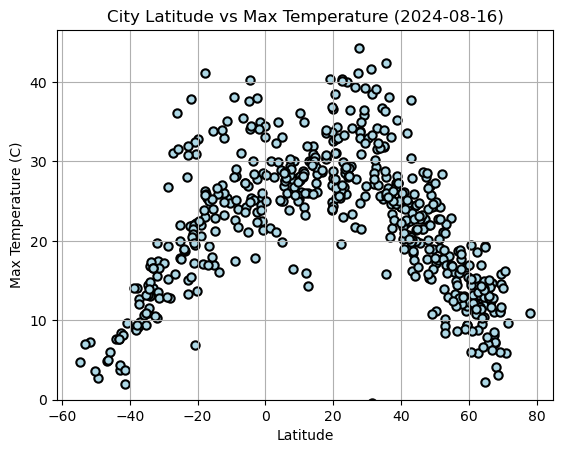

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]

plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylim(0,)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2024-08-16)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

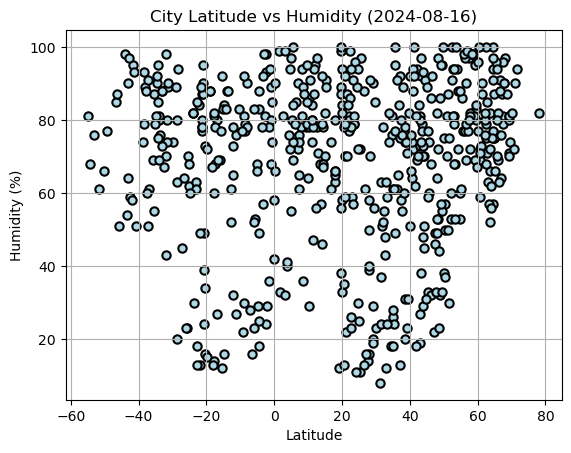

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

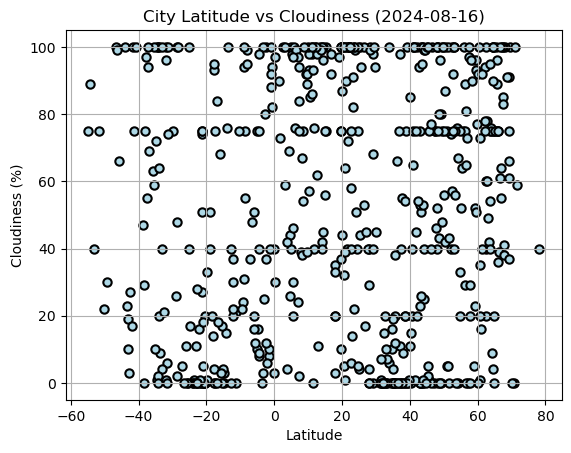

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

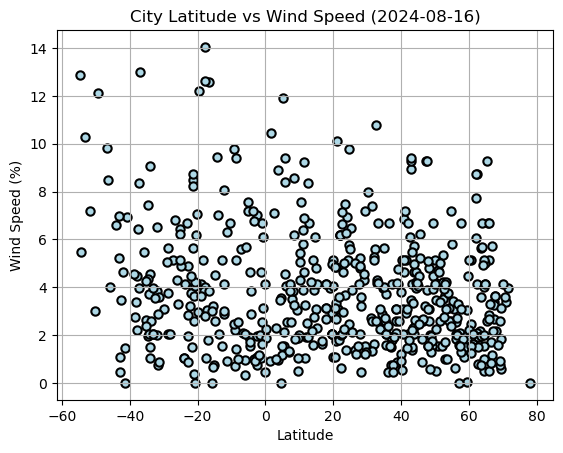

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='lightblue', edgecolors="black", linewidths=1.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhosaly,45.4878,64.0781,23.11,33,5,5.22,KZ,1724003410
1,tomatlan,19.9333,-105.2500,32.53,58,87,2.76,MX,1724003411
2,la passe,45.5549,-0.8967,19.70,60,1,6.21,FR,1724003413
4,paka,4.6374,103.4368,24.96,94,44,0.00,MY,1724003415
7,newman,37.3138,-121.0208,23.36,58,0,1.79,US,1724003418


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,prado,-17.3411,-39.2208,25.38,68,0,3.03,BR,1724003414
5,port saint john's,-31.6229,29.5448,17.48,80,6,0.76,ZA,1724003416
6,adamstown,-25.0660,-130.1015,17.89,62,100,6.45,PN,1724003417
10,mitsamiouli,-11.3847,43.2844,25.36,76,21,6.30,KM,1724003422
12,edinburgh of the seven seas,-37.0676,-12.3116,9.81,61,69,13.00,SH,1724003424


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.7244749964358808


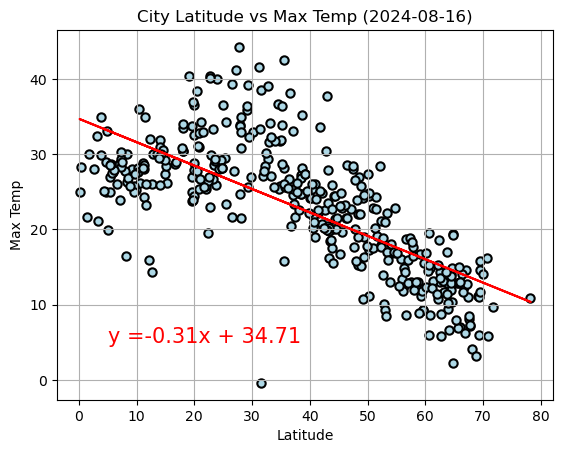

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (5,5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: 0.7947578023641978


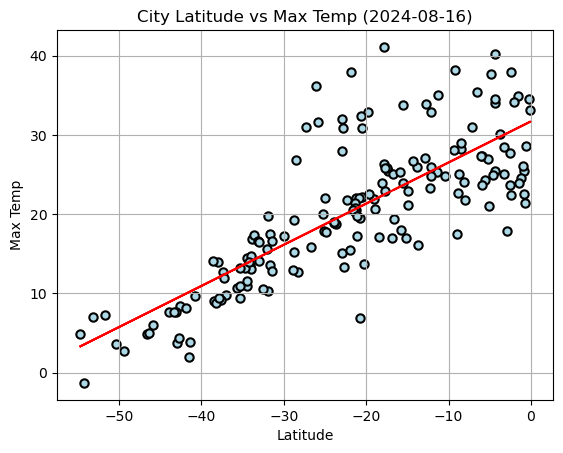

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:**
There is a significant negative correlation between latitude and maximum temperature in the Northern Hemisphere. As a city's location moves farther north from the equator, its maximum temperature decreases. There is a positive correlation between latitude and maximum temperature in the Southern Hemisphere. As a city's location moves closer to the equator, its maximum temperature increases. The Southern Hemisphere also exhibits greater variance in maximum temperatures compared to the Northern Hemisphere, with a wider range of temperature variations among cities located at the same latitude.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.12712116190773637


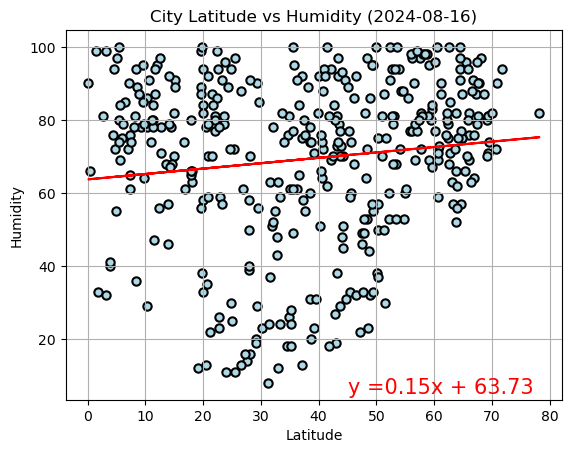

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: -0.1904119613879803


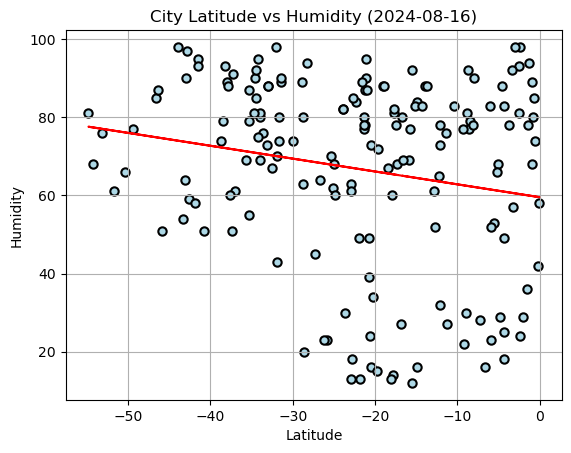

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:** 
There is minimal correlation between humidity levels and a city's position in the Southern Hemisphere. While higher humidity levels are observed near the equator, the range of humidity levels broadens as one moves farther south, even at the same altitudes. There is little to no correlation between humidity levels and a city's position as it moves north from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: -0.04488199406793529


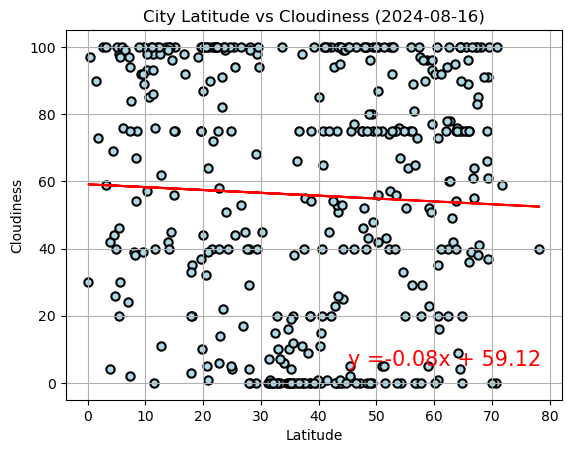

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: -0.11489118328874968


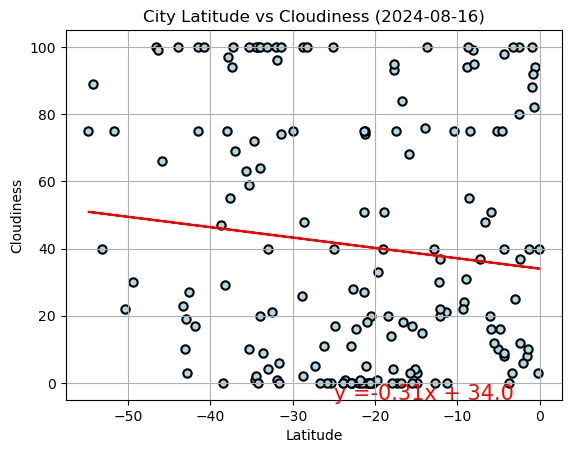

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-25,-5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:**
Cloudiness shows no relationship with a city's distance from the equator in the Northern Hemisphere, with cloud cover varying widely across all latitudes. Similarly, in the Southern Hemisphere, cloudiness is not influenced by latitude, with levels fluctuating from 0% to 100% regardless of a city's position.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: -0.1476197595278189


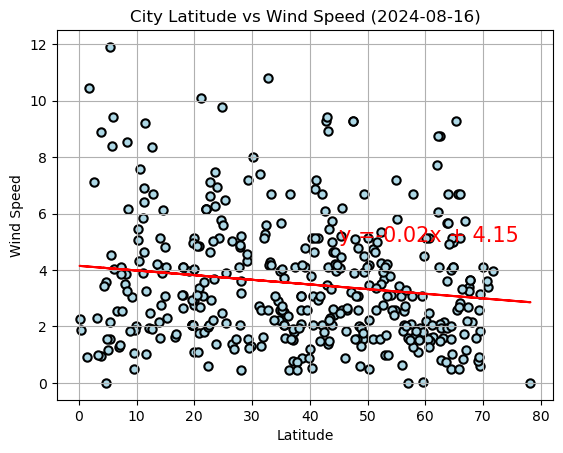

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

The r^2 value is: -0.2070335856659431


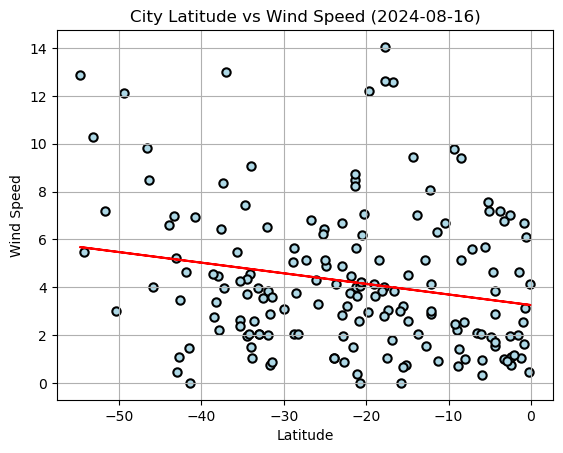

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, color='lightblue', edgecolors="black", linewidths=1.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2024-08-16)")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (45, 5), fontsize=15, color="red")
print(f'The r^2 value is: {rvalue}')
plt.grid()

**Discussion about the linear relationship:**
There is minimal correlation between wind speed and latitude in the Northern Hemisphere, with most cities experiencing wind speeds varying between 0 and 20 mph across the region.

In the Southern Hemisphere, there is a slight negative correlation between wind speed and latitude, where wind speeds tend to increase slightly as one moves farther south from the equator.